In [99]:
import plotly.express as px
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt


In [100]:
data = pd.read_csv('results/optimization_results_world.csv')

In [101]:
data = data.set_index('Country')

In [102]:
# Population data
# pop_data = pd.read_excel('../population_data_UN.xlsx', index_col=0, header = 1)
# pop_data = pop_data['Total Population, as of 1 January (thousands)']
# for col in data.columns[1:]: 
#     for country in data.index:
#         # print(country)
#         data[f'{col}_normalized']=data[col]/pop_data.loc[country]
#         # data[f'{col}_normalized']=data[col]/pop_data.loc[country]

In [103]:
for col in data.columns[1:]: 
    data[f'{col}_normalized']=data[col]/data['mean_load']


In [104]:

for c in data.index.to_list(): 
    results = pd.read_pickle(f'results/{c}/optimization_results.pickle')
    data.loc[c, 'efficiency_wind'] = data.loc[c, 'P_wind']/results['E_wind']
    data.loc[c, 'efficiency_pv'] = data.loc[c, 'P_pv']/results['E_pv']
    data.loc[c, 'efficiency_dispatch'] = data.loc[c, 'P_dispatch']/results['E_dispatch']

In [105]:
data

,iso_alpha,mean_load,E_dispatch,P_dispatch,E_stock,P_pv,P_wind,mean_load_normalized,E_dispatch_normalized,P_dispatch_normalized,E_stock_normalized,P_pv_normalized,P_wind_normalized,efficiency_wind,efficiency_pv,efficiency_dispatch
Country,,,,,,,,,,,,,,,,
Afghanistan,AFG,810.466324,1.305492e+06,1133.330747,3.266014e+06,3084.284965,2960.331781,1.0,1610.790699,1.398369,4029.796237,3.805568,3.652628,0.005352,0.000471,0.000868
Albania,ALB,833.338813,1.008694e+06,954.271612,2.508940e+06,2757.741044,1715.520371,1.0,1210.425277,1.145118,3010.708394,3.309267,2.058611,0.000690,0.000573,0.000946
Algeria,DZA,7850.452511,9.442888e+06,11241.069336,1.123568e+07,16478.296839,9412.479046,1.0,1202.846283,1.431901,1431.214111,2.099025,1.198973,0.000277,0.000473,0.001190
Armenia,ARM,747.713584,1.057766e+06,1092.491949,2.668602e+06,2514.321448,1317.801086,1.0,1414.667706,1.461110,3569.015823,3.362680,1.762441,0.000896,0.000495,0.001033
Austria,AUT,8602.737215,1.008267e+07,11643.677533,2.000286e+07,23183.567889,14940.768295,1.0,1172.030014,1.353485,2325.174351,2.694906,1.736746,0.000433,0.000568,0.001155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Australia,AUS,28808.214840,4.330775e+07,38683.000000,7.123629e+07,97991.964509,32258.088156,1.0,1503.312492,1.342777,2472.776836,3.401529,1.119753,0.000291,0.000693,0.000893
United Kingdom,GBR,41099.310046,4.502657e+07,62016.030552,4.639020e+07,92575.632514,52573.564381,1.0,1095.555373,1.508931,1128.734251,2.252486,1.279184,0.000203,0.000911,0.001377
Bolivia,BOL,974.887785,1.074348e+06,1328.000000,2.963024e+06,2970.511090,2600.806132,1.0,1102.022272,1.362208,3039.348371,3.047029,2.667801,0.000647,0.000657,0.001205


## Normalized plots

Documentation on choropleth : https://plotly.com/python/choropleth-maps/

In [106]:
# Create basic choropleth map
fig = px.choropleth(data, locations='iso_alpha', color='E_dispatch_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable electricity needs (hours of average load)', color_continuous_scale='portland')
fig.show()

In [107]:
fig = px.choropleth(data, locations='iso_alpha', color='E_stock_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='Storage utilization (hours of average load)', color_continuous_scale='portland')
fig.show()

In [108]:
fig = px.choropleth(data, locations='iso_alpha', color='P_dispatch_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable capacity (normalized by average load)', color_continuous_scale='portland')
fig.show()

In [109]:
fig = px.choropleth(data, locations='iso_alpha', color='efficiency_dispatch', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable efficiency (capacity/energy)', color_continuous_scale='portland')
fig.show()

In [110]:
fig = px.choropleth(data, locations='iso_alpha', color='P_pv_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='PV capacity (normalized by average load)', color_continuous_scale='portland')
fig.show()

In [111]:
fig = px.choropleth(data, locations='iso_alpha', color='P_wind_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='Wind capacity (normalized by average load)', color_continuous_scale='portland')
fig.show()

In [112]:
fig = px.choropleth(data, locations='iso_alpha', color='efficiency_wind', hover_name='iso_alpha',
                    projection='natural earth', title='Wind efficiency (capacity/energy)', color_continuous_scale='portland')
fig.show()

In [113]:
fig = px.choropleth(data, locations='iso_alpha', color='efficiency_pv', hover_name='iso_alpha',
                    projection='natural earth', title='PV efficiency (capacity/energy)', color_continuous_scale='portland')
fig.show()

# Absolute plots

In [114]:
fig = px.choropleth(data, locations='iso_alpha', color='E_dispatch', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable electricity needs (MWh)', color_continuous_scale='portland')
fig.show()

In [115]:
fig = px.choropleth(data, locations='iso_alpha', color='E_stock', hover_name='iso_alpha',
                    projection='natural earth', title='Storage utilization (MWh)', color_continuous_scale='portland')
fig.show()

In [116]:
fig = px.choropleth(data, locations='iso_alpha', color='P_dispatch', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable capacity (MW)', color_continuous_scale='portland')
fig.show()

In [117]:
fig = px.choropleth(data, locations='iso_alpha', color='P_pv', hover_name='iso_alpha',
                    projection='natural earth', title='PV capacity (MW)', color_continuous_scale='portland')
fig.show()

In [118]:
fig = px.choropleth(data, locations='iso_alpha', color='P_wind', hover_name='iso_alpha',
                    projection='natural earth', title='Wind capacity (MW)', color_continuous_scale='portland')
fig.show()

# Köppen Climate Classification

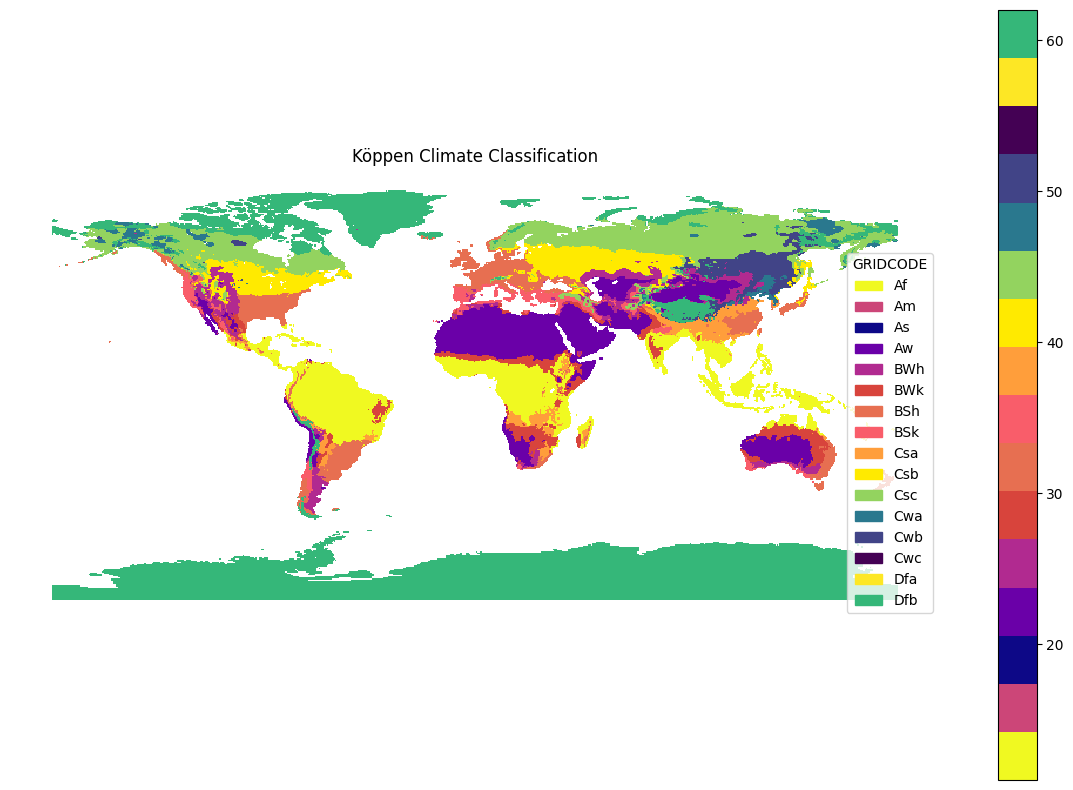

In [119]:
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
# Load the Köppen climate classification shapefile
shapefile_path = 'koppen_climates/c1976_2000_1.shp'
koppen_data = gpd.read_file(shapefile_path)

colors = [
    "#f0f921", "#cc4678", "#0d0887", "#6a00a8", "#b12a90", "#d8443c", "#e76f51", "#f95d6a",
    "#ff9e3b", "#ffea00", "#93d35f", "#2a788e", "#414487", "#440154", "#fde725", "#35b779"
]
cmap = ListedColormap(colors)
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
koppen_data.plot(column='GRIDCODE',cmap = cmap, ax=ax, legend=True)

legend_labels = {
    1: "Af",
    2: "Am",
    3: "As",
    4: "Aw",
    5: "BWh",
    6: "BWk",
    7: "BSh",
    8: "BSk",
    9: "Csa",
    10: "Csb",
    11: "Csc",
    12: "Cwa",
    13: "Cwb",
    14: "Cwc",
    15: "Dfa",
    16: "Dfb",
}
legend_handles = [Patch(color=colors[i-1], label=legend_labels[i]) for i in range(1, 17)]
ax.legend(handles=legend_handles, title='GRIDCODE', loc='lower right')
# ax.legend()
ax.set_title('Köppen Climate Classification')
ax.set_axis_off()
plt.show()

In [120]:
koppen_data

,ID,GRIDCODE,geometry
0,1,62,"POLYGON ((-37.50000 83.50000, -38.00000 83.500..."
1,2,62,"POLYGON ((-29.50000 83.50000, -37.00000 83.500..."
2,3,62,"POLYGON ((-46.00000 83.00000, -46.00000 83.500..."
3,4,62,"POLYGON ((-42.50000 83.50000, -39.50000 83.500..."
4,5,61,"POLYGON ((55.50000 81.00000, 55.50000 81.50000..."
...,...,...,...
2254,2255,61,"POLYGON ((-59.50000 -73.00000, -59.00000 -73.0..."
2255,2256,61,"POLYGON ((168.50000 -76.50000, 168.00000 -76.5..."
2256,2257,61,"POLYGON ((-66.00000 -77.00000, -66.50000 -77.0..."
2257,2258,61,"POLYGON ((-159.00000 -80.00000, -164.00000 -80..."
